**About Dataset**

The diamonds dataset includes detailed information on various diamond attributes, aimed primarily at predicting prices. It contains the following features:

Carat: A measurement of weight, directly affecting price.

Cut: Graded as Fair, Good, Very Good, Premium, and Ideal, indicating the craftsmanship and quality of the cut.

Color: Rated from D (best) to J (worst) based on colorlessness.

Clarity: Graded from IF (Internally Flawless) to I3, indicating the presence of inclusions or blemishes.

Depth and Table: Measurements affecting the diamond’s sparkle.

x, y, z (Dimensions): Representing length, width, and depth.

The price attribute is the target variable, representing the diamond's price in USD. This dataset is useful for exploring how different diamond characteristics influence market price, making it valuable for regression analysis and feature selection studies.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
df = pd.read_csv('/content/diamonds.csv.zip')#to load dataset
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


This diamonds dataset contains 53,940 entries across 11 columns,no null values,dtypes: float64(6), int64(2), object(3)

In [ ]:
df.duplicated().sum()

0

this have no duplicates

In [ ]:
df.shape

(53940, 11)

contains 53,940 entries across 11 columns

In [ ]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


to generates descriptive statistics of the numerical columns

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>,
        <Axes: >]], dtype=object)

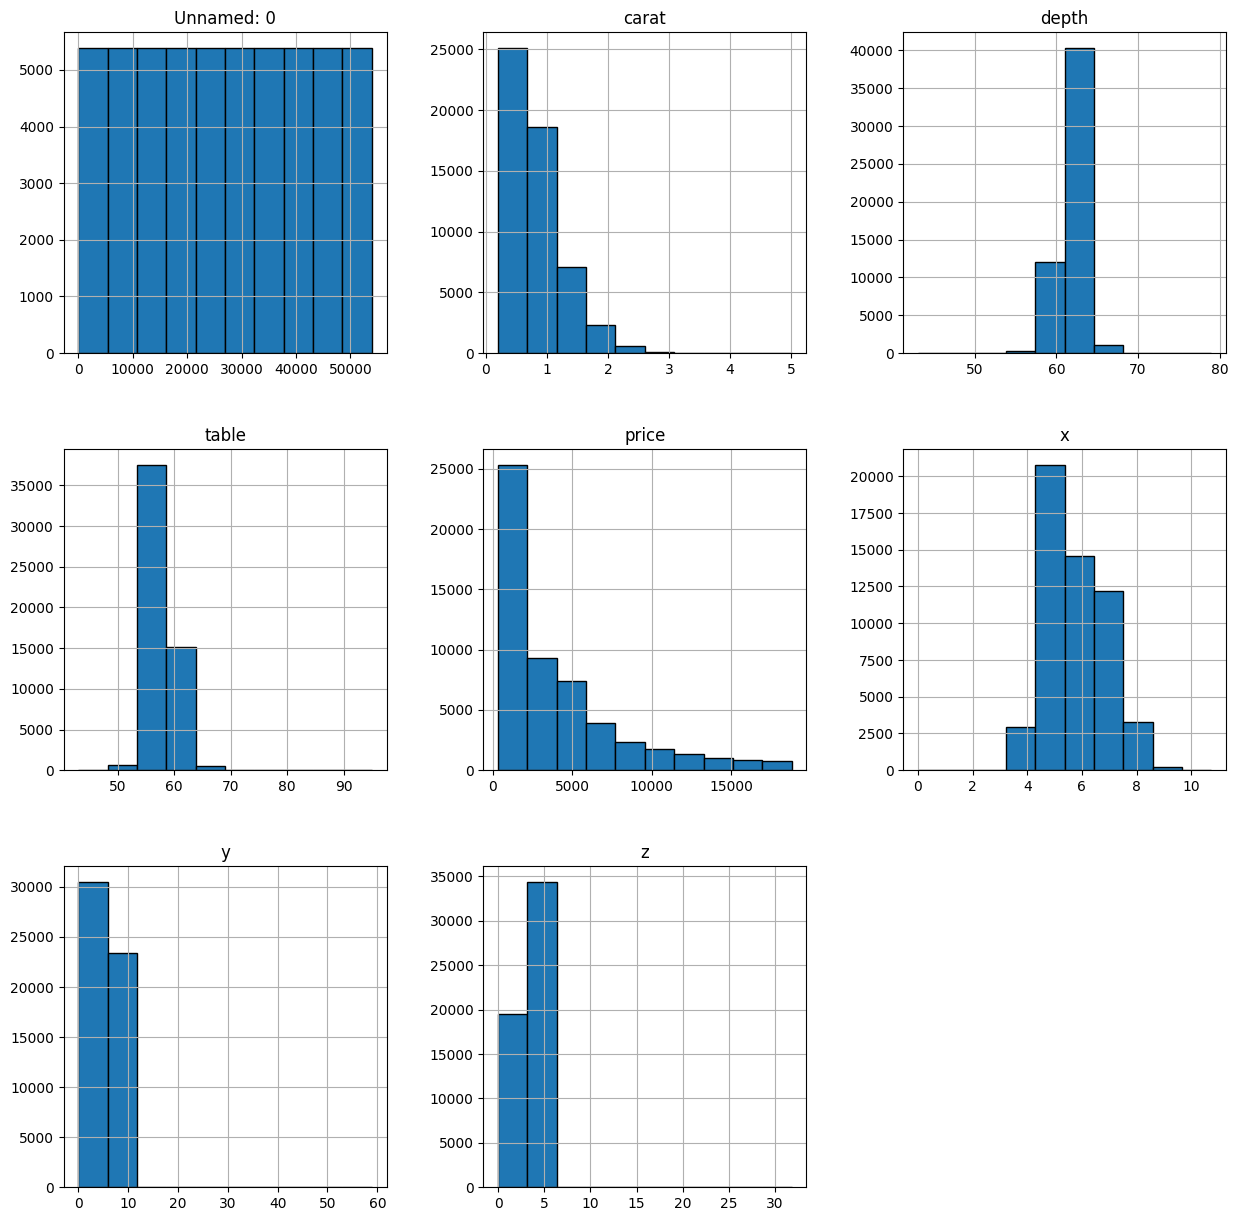

In [ ]:
df.hist(edgecolor='black',figsize=(15,15))

this have skewness

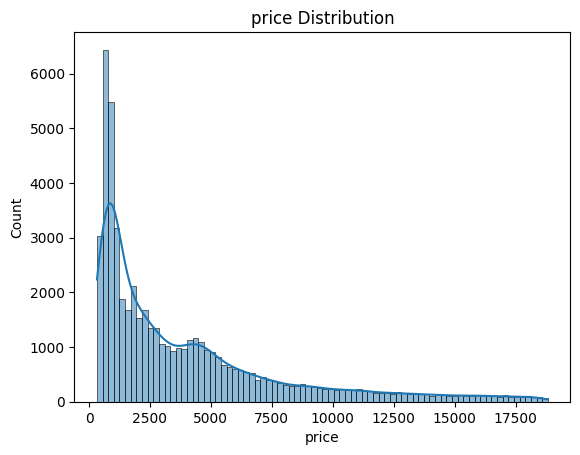

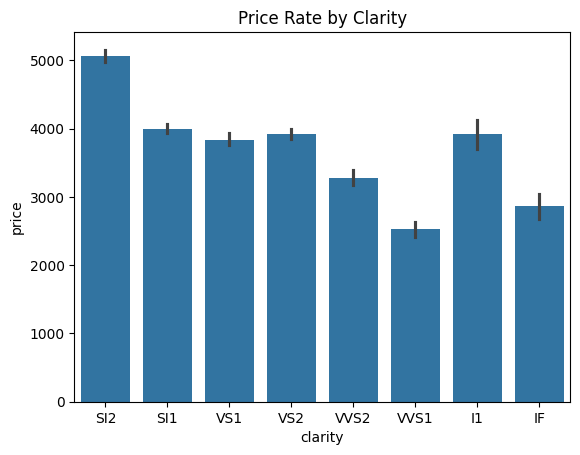

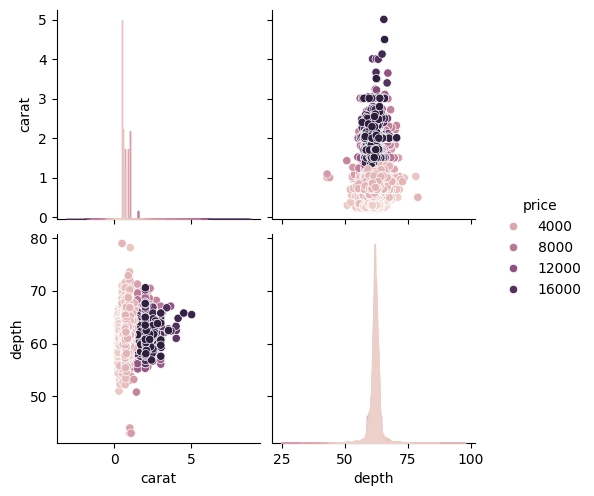

In [ ]:
# Univariate analysis: Distribution of 'price'
sns.histplot(df['price'], kde=True)
plt.title('price Distribution')
plt.show()

# Bivariate analysis: price rate by 'clarity'
sns.barplot(x='clarity', y='price', data=df)
plt.title('Price Rate by Clarity')
plt.show()

# Multivariate analysis: Pair plot of numerical features
sns.pairplot(df[['carat', 'depth', 'price']], hue='price')
plt.show()



1. **Univariate Analysis (Distribution of 'price')**: The histogram with KDE overlay shows the distribution of diamond prices, revealing price spread and skewness.
  
2. **Bivariate Analysis (Price by 'clarity')**: The bar plot displays the average price for each clarity grade, highlighting how clarity impacts price on average.
  
3. **Multivariate Analysis (Pair Plot)**: The pair plot of 'carat', 'depth', and 'price' shows relationships among these variables. Coloring by 'price' intensity allows for visualizing how these numerical features correlate with price.

In [ ]:
df['cut'] = labelencoder.fit_transform(df['cut'])
df['color'] = labelencoder.fit_transform(df['color'])
df['clarity'] = labelencoder.fit_transform(df['clarity'])

Encoding categorical features: 'cut', 'color', and 'clarity'

LabelEncoder converts each category into a numerical label.

This transformation allows these features to be used in machine learning models.

In [ ]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


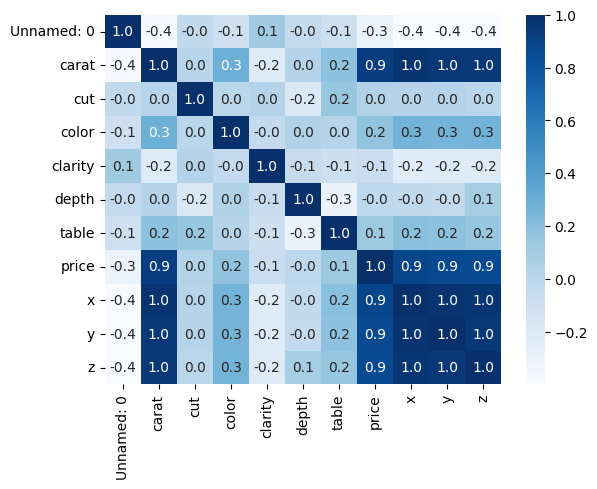

In [ ]:
corr_matrix=df.corr()
corr_matrix
sns.heatmap(corr_matrix,annot=True,fmt='0.01f',robust=True,cmap='Blues')
plt.show()

In [ ]:
s=df.corr()['price']
s.sort_values(ascending=False)

,price
price,1.000000
carat,0.921591
x,0.884435
y,0.865421
z,0.861249
color,0.172511
table,0.127134
cut,0.039860
depth,-0.010647
clarity,-0.071535


This code calculates the correlation matrix of the dataset, which quantifies the strength and direction of relationships between numerical features. The output is a table showing correlation values, where values close to 1 or -1 indicate strong positive or negative correlations, respectively.

The heatmap visually represents this matrix, with color intensity based on the correlation strength. Annotations display the exact correlation values for easy reference. This helps identify features with high correlation, which might be redundant or predictive of each other.

In [ ]:
df1 = df.drop(columns=['Unnamed: 0'])
df1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


This code removes the columns **'Unnamed: 0'** from the original DataFrame `df`, resulting in a new DataFrame `df1` with only the remaining columns. The resulting `df1` contains features that likely have the most direct relationship to the target variable, **'price'**. This selection focuses on numerical attributes such as **'carat'**,**'color'**, **'table'**, **'cut'**, **'depth'**, **'clarity'**, and  **'x'**, **'y'**, **'z'**, and **'price'**, simplifying the dataset for further analysis or modeling.

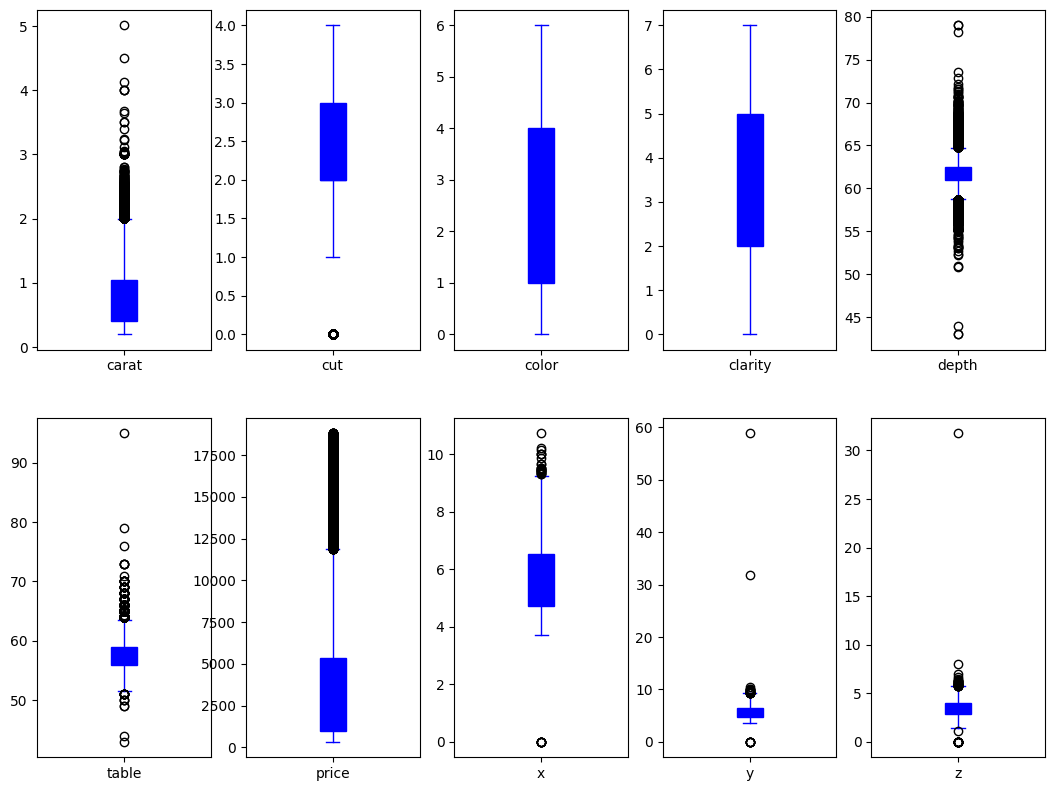

In [ ]:
df1.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

this shows th outlier

          carat       cut     color   clarity     depth     table     price  \
0      0.207014  1.098612  0.693147  1.386294  4.135167  4.025352  5.789960   
1      0.190620  1.386294  0.693147  1.098612  4.107590  4.127134  5.789960   
2      0.207014  0.693147  0.693147  1.609438  4.058717  4.189655  5.793014   
3      0.254642  1.386294  1.791759  1.791759  4.149464  4.077537  5.814131   
4      0.270027  0.693147  1.945910  1.386294  4.163560  4.077537  5.817111   
...         ...       ...       ...       ...       ...       ...       ...   
53935  0.542324  1.098612  0.000000  1.098612  4.123903  4.060443  7.922261   
53936  0.542324  0.693147  0.000000  1.098612  4.160444  4.025352  7.922261   
53937  0.530628  1.609438  0.000000  1.098612  4.155753  4.110874  7.922261   
53938  0.620576  1.386294  1.609438  1.386294  4.127134  4.077537  7.922261   
53939  0.559616  1.098612  0.000000  1.386294  4.146304  4.025352  7.922261   

              x         y         z  
0      1.5993

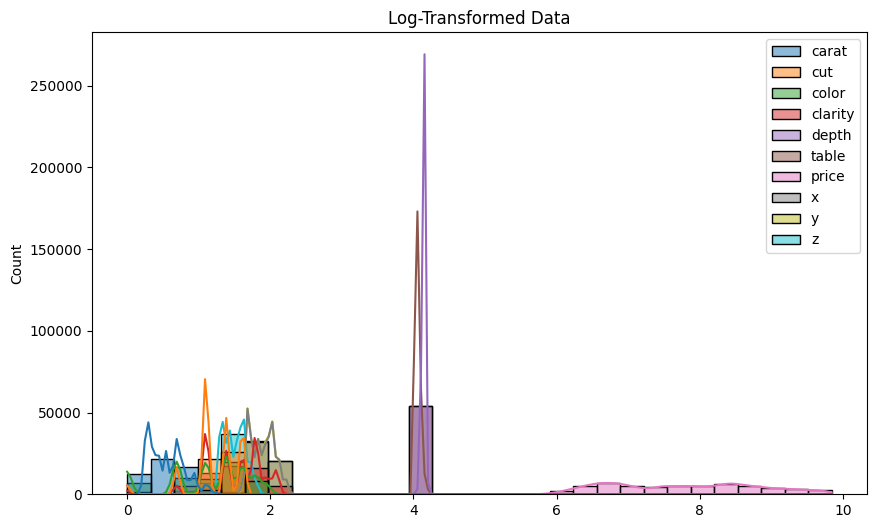

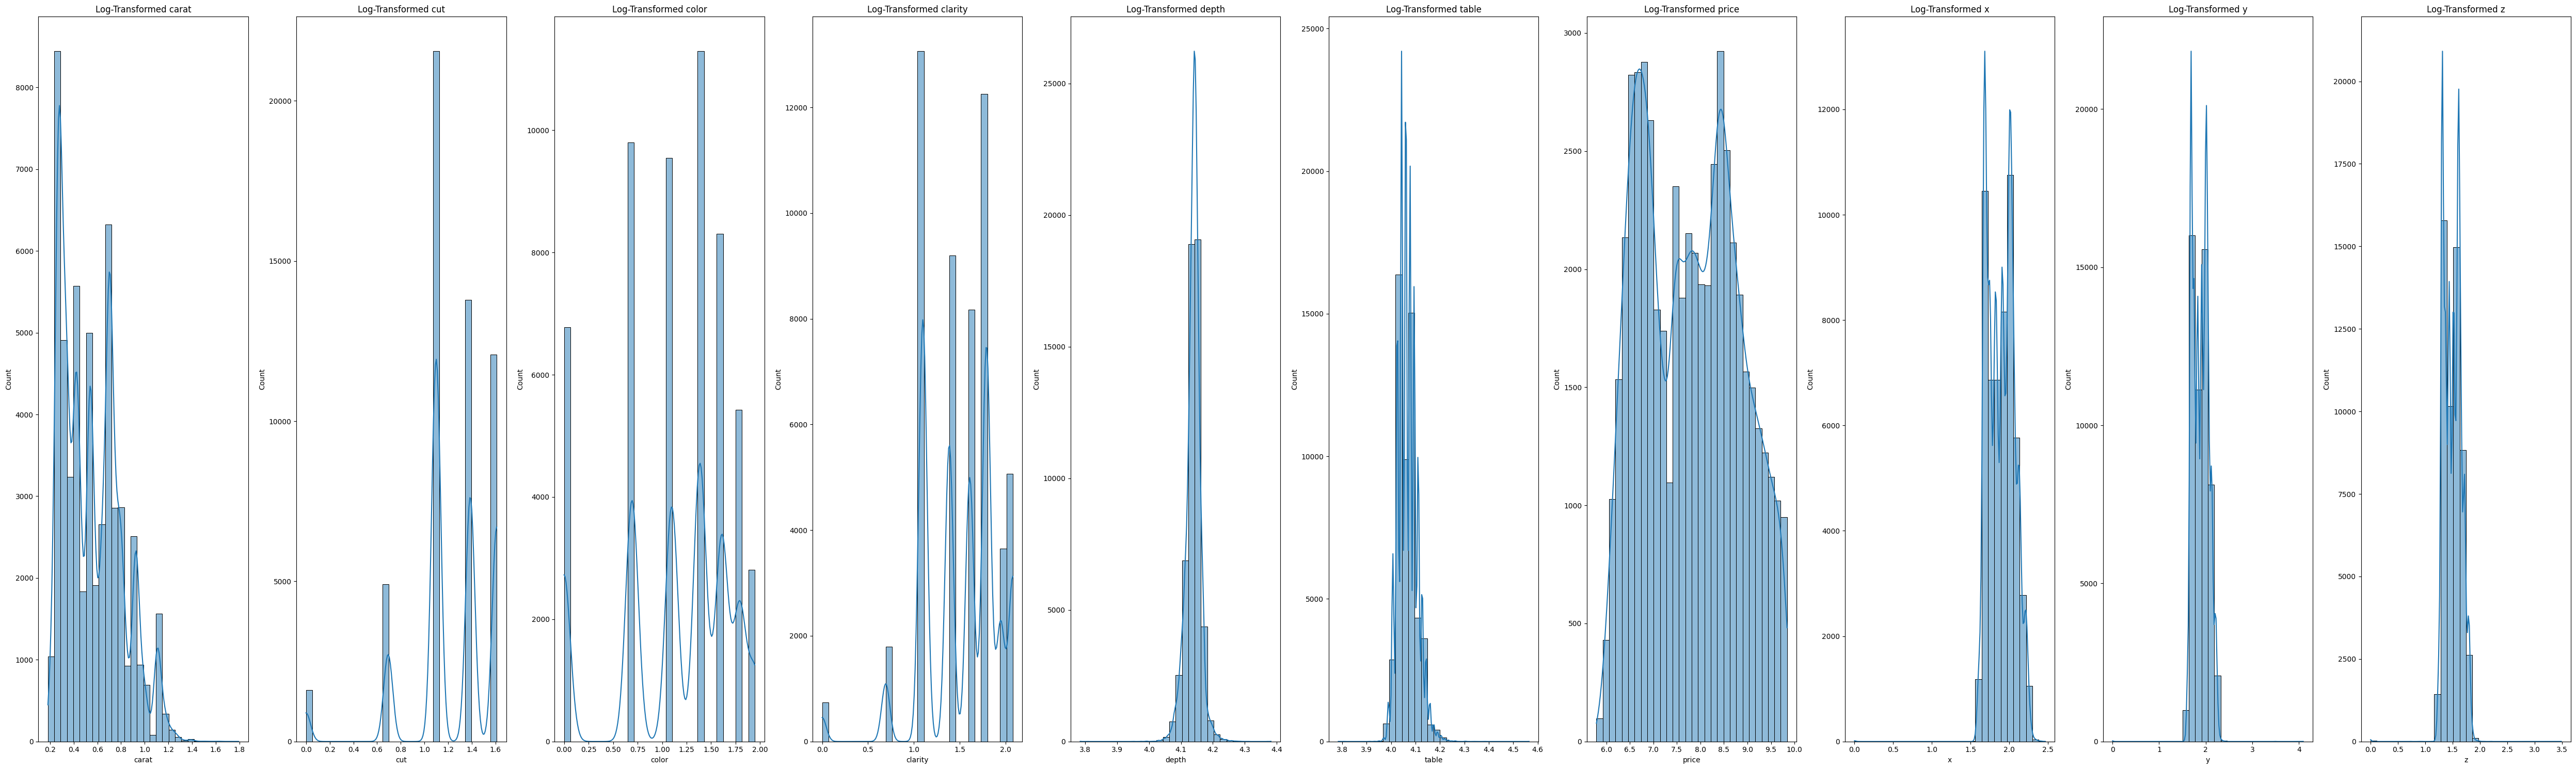

In [ ]:
#To handle skewness
log_data = np.log(df1 + 1)  # Adding 1 to avoid log(0)
print(log_data)

# Plotting log-transformed data distribution
plt.figure(figsize=(10, 6))
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()


to convert normal distribution sand removing outlier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
df1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
IF=independent_feature=['carat','cut','color','clarity',	'depth', 'table','x','y',	'z']
DF=dependent_feature=['price']
x=df[IF]
y=df[DF]

This code snippet defines independent and dependent features for analysis.

- **Independent Features (`IF`)**: This list includes **'carat'**, **'x'**, **'y'**, and **'z'**, which are used to predict the target variable.
  
- **Dependent Feature (`DF`)**: This list contains **'price'**, the variable to be predicted.

The code then creates two new variables: `x` contains the independent features extracted from the DataFrame `df`, and `y` contains the dependent feature (price). This setup is essential for modeling and prediction tasks.

In [ ]:
# Create a StandardScaler object
scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# Fit the scaler to your data and transform it
x_scaled = scaler_x.fit_transform(x)  # Use the selected features from 'hh'
# changed 'scalar_y' to 'scaler_y'
# y_scaled = scaler_y.fit_transform(y)


In [ ]:
# from sklearn.preprocessing import MinMaxScaler # Imports the MinMaxScaler class from scikit-learn for feature scaling

# # # Create a MinMaxScaler object for the independent features (x)
# minmax_x = MinMaxScaler()

# # # Fit the scaler to the independent features (x) and transform them
# minmax_x.fit_transform(x)

# # # Create a MinMaxScaler object for the dependent feature (y)
# minmax_y = MinMaxScaler()

# # # Fit the scaler to the dependent feature (y) and transform it
# minmax_y.fit_transform(y)

This code uses the **MinMaxScaler** from scikit-learn to scale both independent and dependent features.

1. **Independent Features (`x`)**: A **MinMaxScaler** object is created and fitted to `x`, transforming its values to a range between 0 and 1, which is essential for many machine learning algorithms that perform better with normalized data.

2. **Dependent Feature (`y`)**: A separate **MinMaxScaler** is created and fitted to `y`, applying the same transformation to the price values.

The scaling ensures that all features contribute equally to the model.

In [ ]:
# Split the scaled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(43152, 9)
(10788, 9)
(43152, 1)
(10788, 1)


This code splits the dataset into training and testing sets using the `train_test_split` function.

- **Parameters**:
  - `test_size=0.2`: Allocates 20% of the data for the testing set and 80% for training.
  - `random_state=42`: Ensures reproducibility by allowing the same random split each time the code is run.

The `print` statements display the shapes of the training and testing sets for both features (`x`) and target (`y`), helping verify the successful split of the dataset.

In [ ]:
model=RandomForestRegressor()
#why using RandomForestRegressor(can handle non-linear data and perform well even when relationships between variables are complex.)
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

This code initializes a **RandomForestRegressor** model, which is well-suited for handling complex, non-linear relationships in data due to its ensemble of decision trees. Random forests also reduce the risk of overfitting by averaging multiple decision trees, thus improving performance and robustness.

After creating the model, the code fits it to the training data (`x_train` and `y_train`), allowing the model to learn relationships between features and target values in preparation for predictions on unseen data.

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([ 552.155, 2352.78 , 1215.95 , ...,  782.09 , 9607.82 , 3947.37 ])

This code uses the trained **RandomForestRegressor** model to make predictions on the test set (`x_test`). The output, `y_pred`, is an array of predicted values for **price**, based on the test data features. These predictions can be compared to the actual `y_test` values to evaluate model performance, typically using metrics like Mean Squared Error (MSE) or R-squared (R²) to assess accuracy.

In [ ]:
mse=mean_squared_error(y_test,y_pred)#An indicator of average squared prediction error.
r2=r2_score(y_test,y_pred)#An indicator of the model’s fit quality.
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
print('mean absolute error:',mae)
print('root mean squared error:',rmse)
print('r2 score:',r2)

mean absolute error: 268.17028439668417
root mean squared error: 542.90295873561
r2 score: 0.9814589587291034


This code calculates key evaluation metrics to assess the performance of the **RandomForestRegressor** model on the test data:

- **Mean Absolute Error (MAE)**: Measures the average magnitude of prediction errors, providing a straightforward error measure.
- **Root Mean Squared Error (RMSE)**: Gives the square root of the average squared errors, penalizing larger errors more heavily.
- **R-squared (R²)**: Indicates the proportion of variance in the target variable explained by the model, measuring fit quality (closer to 1 is better).

The `print` statements display these metrics for quick assessment.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
# Fit the scaler to your training data
scaler.fit(x_scaled) # Assuming X_train is your training data features

carat=float(input('enter the carat:'))
cut=float(input('enter the cut:'))
color=float(input('enter the color:'))
clarity=float(input('enter the clarity:'))
depth=float(input('enter the depth:'))
table=float(input('enter the table:'))
x=float(input('enter the x:'))
y=float(input('enter the y:'))
z=float(input('enter the z:'))
user_input=np.array([[carat,    cut,    color,clarity,depth,table,x,y,z]])

# Apply the same scaling to user input
user_input_scaled = scaler.transform(user_input)

# Predict the price using the scaled input
predicted_price_scaled = model.predict(user_input_scaled)

# Instead of inverse_transform, since we only scaled the input features,
# and the model predicts the price directly (not a scaled price),
# we don't need to unscale the prediction.
# predicted_price = predicted_price_scaled[0]

print('predicted price:',predicted_price_scaled) # Print the predicted price

enter the carat:0.29
enter the cut:3
enter the color:5
enter the clarity:5
enter the depth:62.4
enter the table:58.0
enter the x:4.20
enter the y:4.23
enter the z:2.63
predicted price: [4022.4]


In [ ]:
df1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


to get input

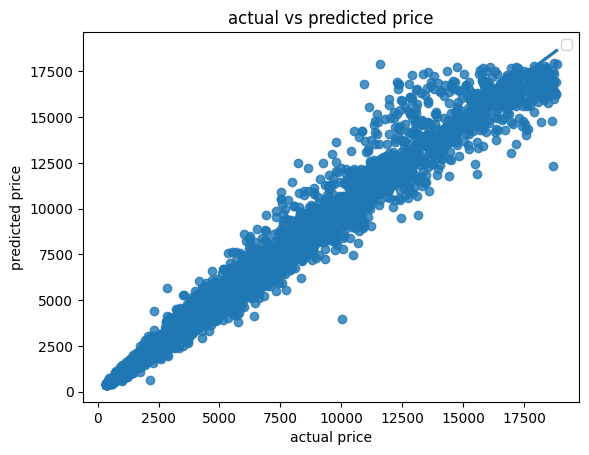

In [ ]:
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual vs predicted price')
plt.legend()
plt.show()

Certainly! I'll break down each part of the code from your diamonds dataset analysis in simpler terms:

### 1. **Importing Libraries**

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
```

- **pandas**: For data manipulation and analysis.
- **numpy**: For numerical operations.
- **matplotlib** & **seaborn**: For data visualization.
- **LabelEncoder**: To convert categorical data (like 'cut' or 'color') into numbers.

### 2. **Loading the Data**

```python
df = pd.read_csv('/content/diamonds.csv.zip')
df
```

- This loads the diamonds dataset from a compressed CSV file into a DataFrame called `df`.

### 3. **Data Information**

```python
df.info()
```

- Displays information about the dataset, like the number of entries, column names, data types, and missing values.

### 4. **Checking for Duplicates**

```python
df.duplicated().sum()
```

- Checks for any duplicate rows in the dataset. Here, no duplicates were found.

### 5. **Dataset Shape**

```python
df.shape
```

- Returns the number of rows and columns in the dataset.

### 6. **Descriptive Statistics**

```python
df.describe()
```

- Provides statistics for numerical columns, such as mean, standard deviation, minimum, and maximum values.

### 7. **Data Visualization - Histograms**

```python
df.hist(edgecolor='black', figsize=(15, 15))
```

- Plots histograms for each numerical feature in the dataset to visualize their distributions.

### 8. **Univariate Analysis (Distribution of 'price')**

```python
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()
```

- Creates a histogram with a KDE (Kernel Density Estimate) to show the distribution of the diamond prices.

### 9. **Bivariate Analysis (Price by 'clarity')**

```python
sns.barplot(x='clarity', y='price', data=df)
plt.title('Price Rate by Clarity')
plt.show()
```

- Plots a bar chart to show the average price for each clarity level. This helps see how clarity impacts price.

### 10. **Multivariate Analysis (Pair Plot)**

```python
sns.pairplot(df[['carat', 'depth', 'price']], hue='price')
plt.show()
```

- Shows pairwise relationships among selected numerical features ('carat', 'depth', 'price') to examine correlations.

### 11. **Encoding Categorical Features**

```python
df['cut'] = labelencoder.fit_transform(df['cut'])
df['color'] = labelencoder.fit_transform(df['color'])
df['clarity'] = labelencoder.fit_transform(df['clarity'])
```

- Converts the categorical columns (cut, color, clarity) into numerical labels to use in machine learning models.

### 12. **Correlation Matrix and Heatmap**

```python
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='0.01f', robust=True, cmap='Blues')
plt.show()
```

- Calculates correlations between numerical features and visualizes them with a heatmap. Darker colors indicate stronger correlations.

### 13. **Dropping Unnecessary Columns**

```python
df1 = df.drop(columns=['Unnamed: 0'])
```

- Removes the 'Unnamed: 0' column, which may be an unnecessary index column.

### 14. **Box Plot for Outliers**

```python
df1.plot(kind='box', subplots=True, layout=(3, 5), figsize=(13, 15), color='blue', patch_artist=True)
plt.show()
```

- Displays box plots for each feature to help identify outliers.

### 15. **Handling Skewness with Log Transformation**

```python
log_data = np.log(df1 + 1)
```

- Applies a log transformation to reduce skewness, especially for features like price.

### 16. **Train-Test Split**

```python
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
```

- Splits the dataset into 80% training data and 20% testing data to train and test the model.

### 17. **Model Training**

```python
model = RandomForestRegressor()
model.fit(x_train, y_train)
```

- Initializes a random forest regressor model and trains it using the training data.

### 18. **Making Predictions**

```python
y_pred = model.predict(x_test)
```

- Uses the trained model to predict diamond prices for the test set.

### 19. **Evaluating Model Performance**

```python
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)
```

- Calculates and prints key evaluation metrics:
   - **MAE**: Average of absolute errors.
   - **RMSE**: Square root of average squared errors.
   - **R²**: Proportion of variance explained by the model.

### 20. **Predicting Price for New Data**

```python
# Assuming carat, cut, color, etc. are inputs
user_input_scaled = scaler.transform(user_input)
predicted_price = model.predict(user_input_scaled)
print('Predicted Price:', predicted_price)
```

- Takes user input, scales it, and uses the model to predict the price of a new diamond.

### 21. **Actual vs. Predicted Price Plot**

```python
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()
```

- Plots actual vs. predicted prices to visually show model accuracy. A good model will have points close to a straight line.

This code follows a complete workflow for analyzing, processing, and modeling diamond prices, providing useful insights on features affecting diamond prices and enabling predictions for new diamonds.